In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

sns.set_theme(style="whitegrid", context='paper', font_scale=1.2)

In [2]:
symps = pd.read_csv('result/bias_symptoms.csv')

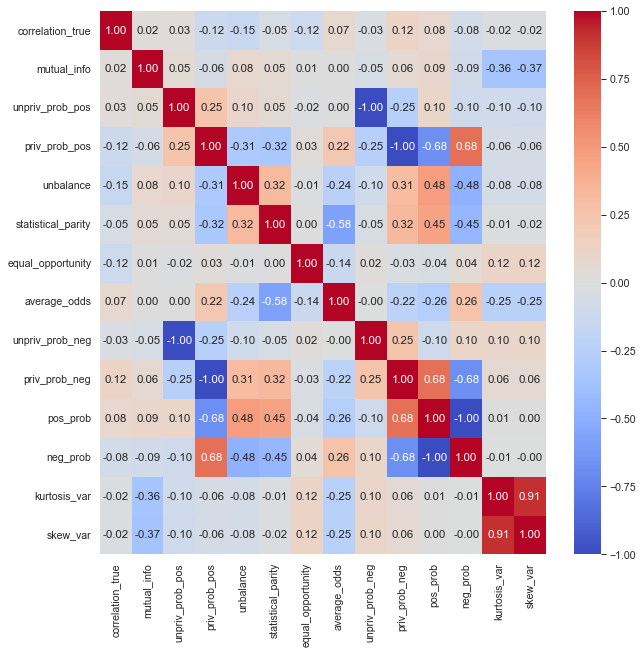

In [3]:
plt.figure(figsize=(10, 10))
sns.heatmap(symps.corr(method='kendall'), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [4]:
symps = pd.read_csv('result_class/bias_symptoms.csv')

In [5]:
def plot_differences(symps, symp, symp_name):
    corr_high_sp = symps[symps["statistical_parity"] == 1][symp].values
    corr_low_sp = symps[symps["statistical_parity"] == 0][symp].values
    corr_high_eo = symps[symps["equal_opportunity"] == 1][symp].values
    corr_low_eo = symps[symps["equal_opportunity"] == 0][symp].values
    corr_high_ao = symps[symps["average_odds"] == 1][symp].values
    corr_low_ao = symps[symps["average_odds"] == 0][symp].values
    df = pd.DataFrame(
        {
            symp_name: [
                corr_high_sp,
                corr_low_sp,
                corr_high_eo,
                corr_low_eo,
                corr_high_ao,
                corr_low_ao,
            ],
            "Metric": [
                "Statistical Parity",
                "Statistical Parity",
                "Equal Opportunity",
                "Equal Opportunity",
                "Average Odds",
                "Average Odds",
            ],
            "Bias": ["High", "Low", "High", "Low", "High", "Low"],
        }
    )
    df = df.explode(symp_name)
    g = sns.FacetGrid(df, col="Metric", height=5, aspect=0.5)
    g.map(
        sns.barplot,
        "Bias",
        symp_name,
        "Bias",
        order=["Low", "High"],
        hue_order=["Low", "High"],
        palette=sns.color_palette()[:2],
    )
    g.add_legend()
    g.set_axis_labels("", "Mutual Information")
    plt.show()
    print(ttest_ind(corr_high_sp, corr_low_sp, equal_var=False))
    print(ttest_ind(corr_high_eo, corr_low_eo, equal_var=False))
    print(ttest_ind(corr_high_ao, corr_low_ao, equal_var=False))

## Analysis of Mutual Information

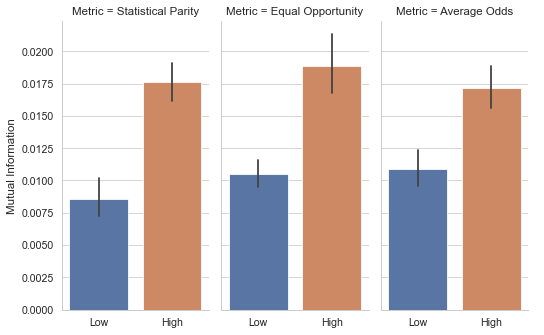

Ttest_indResult(statistic=8.501629262431658, pvalue=2.6542583144106975e-17)
Ttest_indResult(statistic=6.782632314860816, pvalue=1.5113163752438266e-11)
Ttest_indResult(statistic=5.78650477814099, pvalue=7.784102225965793e-09)


In [6]:
plot_differences(symps, "mutual_info", "Mutual Information")

## Correlation

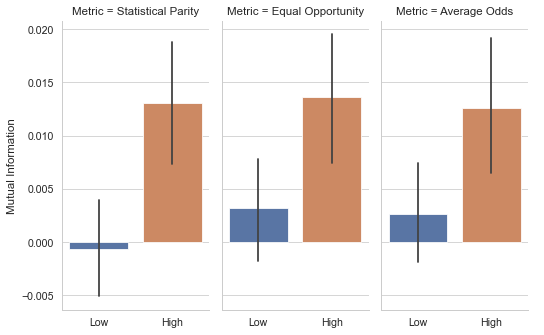

Ttest_indResult(statistic=3.669235303569765, pvalue=0.00024654295917192704)
Ttest_indResult(statistic=2.580752581448258, pvalue=0.00990564156514072)
Ttest_indResult(statistic=2.5392295121391073, pvalue=0.011152445465434818)


In [7]:
plot_differences(symps, "correlation_true", "Kendall's Tau")

## Metrics Distribution

In [28]:
distr = pd.DataFrame(
    [
        {
            "Statistical Parity": [
              symps[symps["statistical_parity"] == 0].shape[0]/symps.shape[0],
              symps[symps["statistical_parity"] == 1].shape[0]/symps.shape[0],
            ],
            "Equal Opportunity": [
              symps[symps["equal_opportunity"] == 0].shape[0]/symps.shape[0],
              symps[symps["equal_opportunity"] == 1].shape[0]/symps.shape[0],
            ],
            "Average Odds": [
              symps[symps["average_odds"] == 0].shape[0]/symps.shape[0],
              symps[symps["average_odds"] == 1].shape[0]/symps.shape[0],
            ],
            "Bias": ["Low", "High"]
        }
    ]
)

In [29]:
distr = distr.explode(['Statistical Parity', 'Equal Opportunity', 'Average Odds', 'Bias']).melt(id_vars='Bias', var_name='Metric', value_name='Proportion')

[Text(0, 0, '0.424313')]

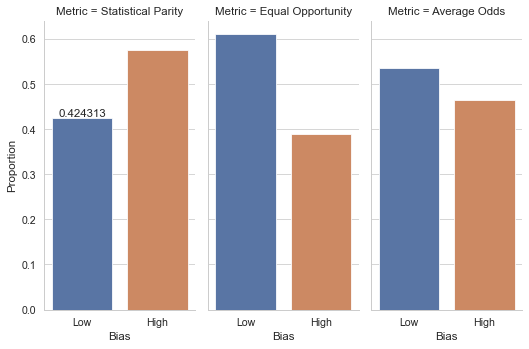

In [35]:
g = sns.catplot(data=distr, col='Metric', x='Bias', y='Proportion', kind='bar', hue="Bias", palette=sns.color_palette()[:2], height=5, aspect=0.5)
g.facet_axis(0, 0).bar_label(g.facet_axis(0, 0).containers[0], )